# BLM19412E Introduction to Data Mining – Term Project

## 1821221045 - Beyza GÜRER

## Summary

The chosen dataset is Heart Failure Prediction Dataset. In this dataset, various features related to the hearts of patients is stored. 

Problem: In this classification problem, the program is expected to predict whether a patient has heart disease given the features.

# Data Understanding

Firstly, examine and understand the data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
#load data from csv and display
heart_df = pd.read_csv("heart.csv")
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
heart_df.shape

(918, 12)

#### The dataset has 918 rows and 12 columns.

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### As seen from the data above, the dataset consists of 12 features. 

Age (Numerical): Age of the patient 

Sex (Binary): Sex of the patient

ChestPainType (Nominal): The type of pain the patient feels

RestingBP (Numerical): Resting blood pressure

Cholesterol (Numerical): Cholesterol value

FastingBS (Binary): Fasting blood sugar of the patient. If the value is larger than 120, it is classified as 1. Else it is 0.

RestingECG (Nominal): Resting electrocardiogram results

MaxHR (Numerical): Maximum heart rate

ExerciseAngina (Binary): Yes if the exercise caused an angina, no if it did not

Oldpeak (Numerical): Measured value in depression

ST_Slope (Ordinal): Slope of the peak exercise

HeartDisease (Binary): Whether the patient has heart disease or not


### Summary Statistics for Features

In [5]:
heart_df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


### Correlation Between Features

In [6]:
heart_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# Data Preprocessing

### Dealing with Missing Values

In [7]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null values in this dataset. Remove random values from RestingBP column and RestingECG column

In [8]:
import random
for i in range(10):
    random_row = random.randint(0, heart_df.shape[0])
    heart_df.loc[random_row, 'RestingBP'] = np.nan
for i in range(10):
    random_row = random.randint(0, heart_df.shape[0])
    heart_df.loc[random_row, 'RestingECG'] = np.nan

In [9]:
heart_df.isnull().sum()

Age                0
Sex                0
ChestPainType      0
RestingBP         10
Cholesterol        0
FastingBS          0
RestingECG        10
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

There are 10 missing values in both RestingBP & RestingECG columns. To deal with missing values, we will fill them according to appropriate algorithm.

#### RestingBP

RestingBP column has numerical values. We can fill the missing values with median or mean. Let us check which one is better to use according to other existing data

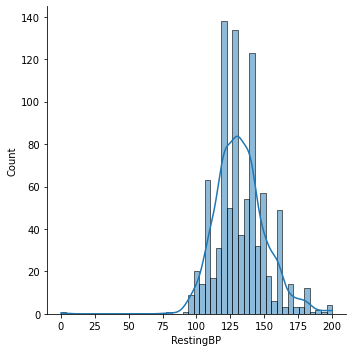

In [10]:
heart_df_copy = heart_df.copy()

#remove null values to exclude them while calculating
heart_df_copy.dropna(inplace=True)
sns.displot(heart_df_copy['RestingBP'], kde=True)

Distribution of this feature seems to be skewed so it is better to use Median value.

In [11]:
#median of the RestingBP column
restingBP_median = heart_df_copy['RestingBP'].median()
restingBP_median

130.0

In [12]:
#fill the null values with this median value
heart_df['RestingBP'].fillna(int(restingBP_median), inplace=True)

In [13]:
heart_df['RestingBP'].isnull().sum()

0

#### RestingECG

This feature consists of nominal values, so mode of the values will be used to fill missing values.

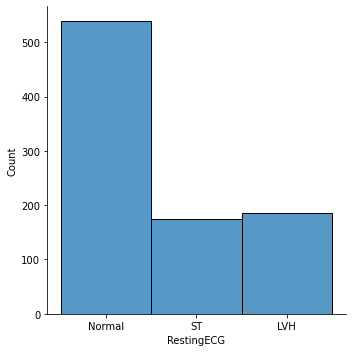

In [14]:
sns.displot(heart_df_copy['RestingECG'])

In [15]:
restingECG_mode = heart_df_copy['RestingECG'].mode()[0]
restingECG_mode

'Normal'

In [16]:
#fill the null values with this mode value 
heart_df['RestingECG'].fillna(restingECG_mode, inplace=True)

In [17]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no null values in the dataset anymore.

## Feature Distributions

([<matplotlib.axis.XTick at 0x14de63610>,
 [Text(0, 0, 'Healthy'), Text(1, 0, 'Heart Disease')])

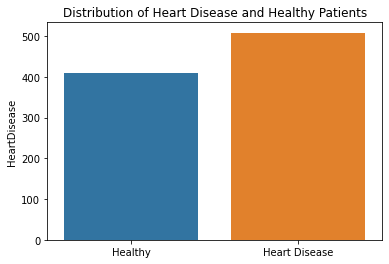

In [147]:
sns.barplot(x=heart_df.HeartDisease.value_counts().index, y=heart_df.HeartDisease.value_counts())
plt.title('Distribution of Heart Disease and Healthy Patients')
plt.xticks([0, 1], ['Healthy', 'Heart Disease'])

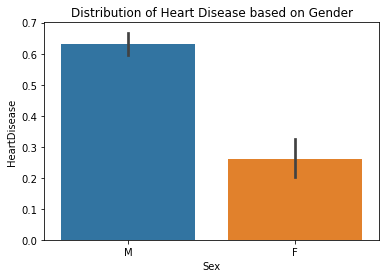

In [19]:
sns.barplot(x='Sex', y='HeartDisease', data=heart_df)
plt.title('Distribution of Heart Disease based on Gender')
plt.show()

Text(0.5, 1.0, 'Distribution of Cholesterol & Maximum Heart Rate')

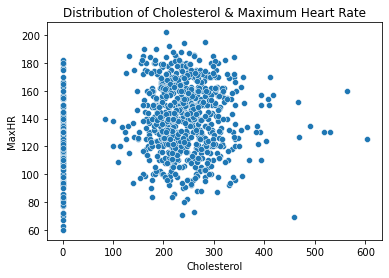

In [20]:
sns.scatterplot(x='Cholesterol', y='MaxHR', data=heart_df)
plt.title('Distribution of Cholesterol & Maximum Heart Rate')

Text(0.5, 1.0, 'Distribution of Maximum Heart Rate')

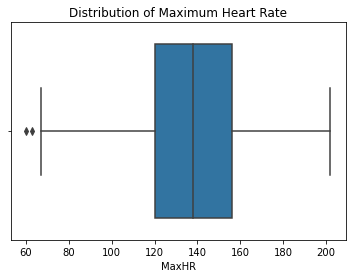

In [21]:
sns.boxplot(x='MaxHR', data=heart_df)
plt.title('Distribution of Maximum Heart Rate')

Text(0.5, 1.0, 'Distribution of Oldpeak values')

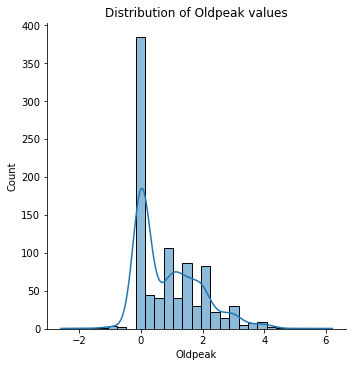

In [22]:
sns.displot(heart_df['Oldpeak'], kde=True)
plt.title('Distribution of Oldpeak values')

Text(0.5, 1.0, 'Pair Plot for Heart Disease Dataset')

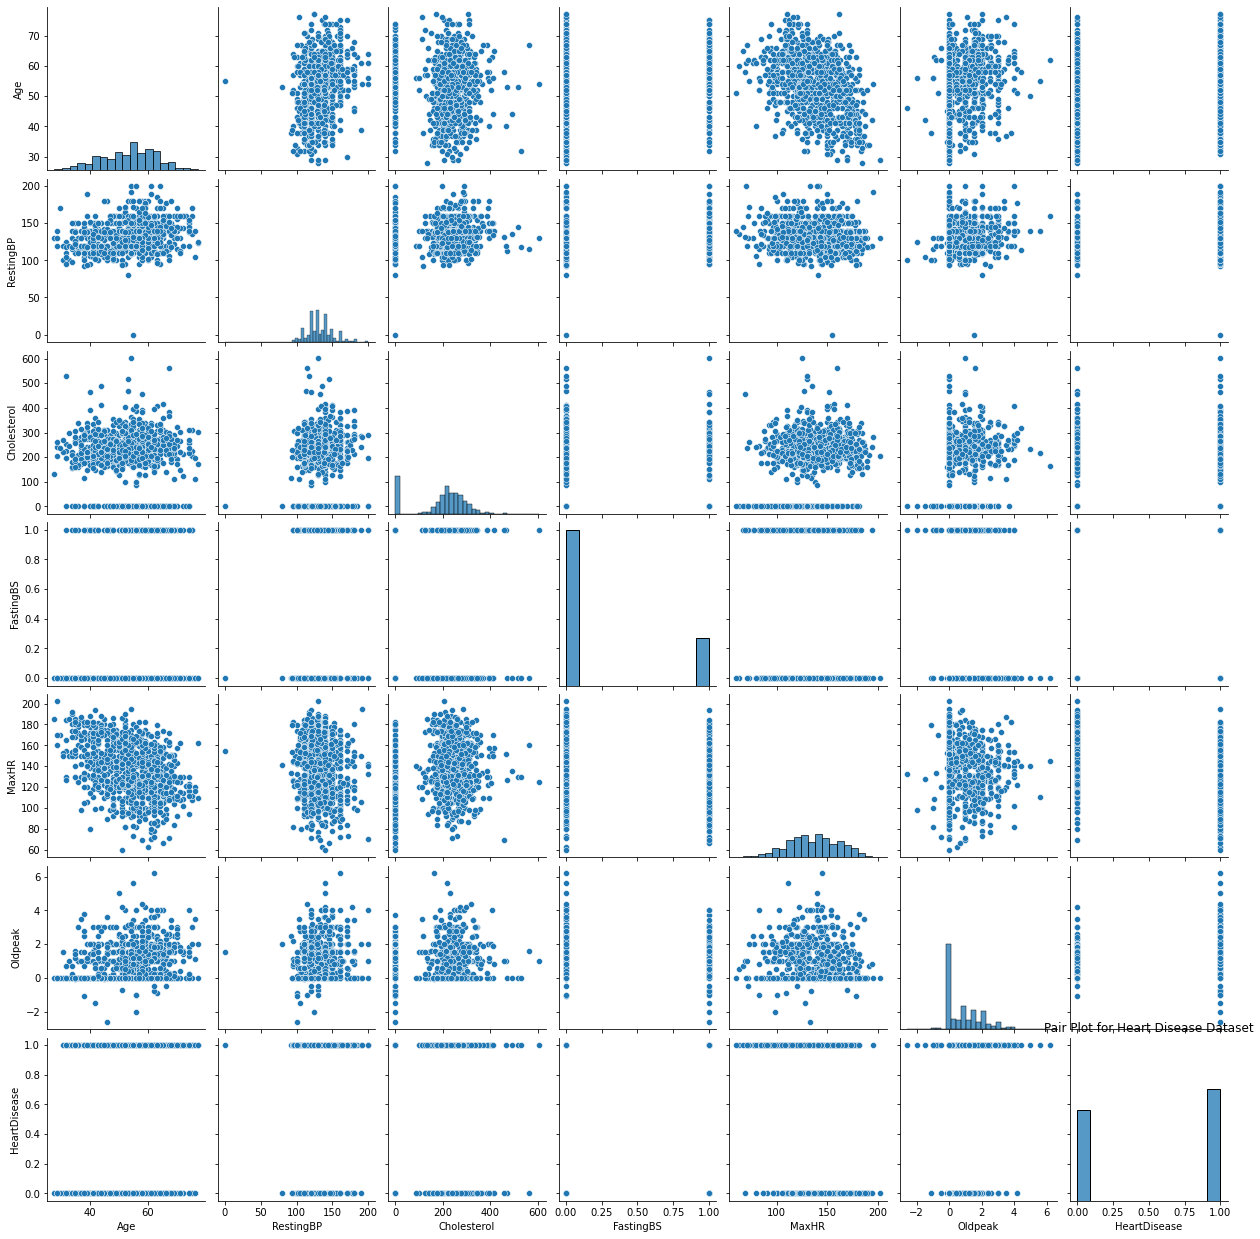

In [23]:
sns.pairplot(heart_df)
plt.title('Pair Plot for Heart Disease Dataset')

## Data Encoding

Firstly One Hot Encoding is applied to extract categorical values into numerical values. To prepare our data for One Hot Encoding, Label Encoder will be used. Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope columns will be encoded.



In [25]:
#One hot encode 
cols_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in cols_to_encode:
    dummies = pd.get_dummies(heart_df[column])
    heart_df = pd.concat([heart_df,dummies ], axis=1)
    heart_df = heart_df.drop(columns=column)

heart_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140.0,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
5,39,120.0,339,0,170,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
6,45,130.0,237,0,170,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
7,54,110.0,208,0,142,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
8,37,140.0,207,0,130,1.5,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
9,48,120.0,284,0,120,0.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# Choosing a Classifier

Firstly, since the problem is a classification problem; different classification methods will be tested. 
In this problem, avoiding false negatives must be a priority. That is labeling a patient with a heart disease as healthy should be avoided. This means apart from 'accuracy', 'recall' metric also must be maximized. 

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

X = heart_df.drop(columns='HeartDisease').values
y = heart_df['HeartDisease'].values

#Split the dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=0)

In [120]:
#Applying K Nearest Neighbour

#initiate classifier with k=7 neigbours and use train sets to train
knn_clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

#predict test set on trained model 
y_predicted_knn =knn_clf.predict(X_test)

#measure how many of the predicted values are actually true
accuracy_knn = accuracy_score(y_test, y_predicted_knn)

#measure performance with false negatives
recall_knn = recall_score(y_test, y_predicted_knn)
print("For KNN classifier, accuracy:", accuracy_knn, "recall:", recall_knn)

#apply cross validation to test on different subsets and measure accuracy
print("Mean of accuracy with cross validation:", cross_val_score(ann_clf, X_train, y_train, cv=5).mean())

For KNN classifier, accuracy: 0.7246376811594203 recall: 0.7852760736196319
Mean of accuracy with cross validation: 0.5373909883720931


In [121]:
#Gaussian Naive Bayes
gn_clf = GaussianNB().fit(X_train, y_train)
y_predicted_gn = gn_clf.predict(X_test)
accuracy_gn = accuracy_score(y_test, y_predicted_gn)
recall_gn = recall_score(y_test, y_predicted_gn)
print("For Gaussian Naive Bayes classifier, accuracy:", accuracy_gn, "recall:", recall_gn)
print("Mean of accuracy with cross validation:", cross_val_score(gn_clf, X_train, y_train, cv=5).mean())

For Gaussian Naive Bayes classifier, accuracy: 0.855072463768116 recall: 0.8895705521472392
Mean of accuracy with cross validation: 0.8629481589147285


In [148]:
#Decision Tree
dt_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_predicted_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_predicted_dt)
recall_dt = recall_score(y_test, y_predicted_dt)
print("For Decision Tree classifier, accuracy:", accuracy_dt, "recall:", recall_dt)
print("Mean of accuracy with cross validation:", cross_val_score(dt_clf, X_train, y_train, cv=5).mean())

For Decision Tree classifier, accuracy: 0.7898550724637681 recall: 0.7791411042944786
Mean of accuracy with cross validation: 0.781952519379845


According to the results above, it is best to use Gaussian Naive Bayes classifier for this problem. But to apply parameter tuning algorithms, Decision Tree Classifier will be used.

# Parameter Tuning

For parameter tuning, Grid Search algorithm will be used. For Decision Tree Classifier, following parameters will be tuned:

- Criterion: Algorithm to calculate best quality of a split. Can be information gain or gini index.

- Splitter: Whether to choose the split point as the best split or random split.

- Maximum Depth: Limit for the maximum depth of tree. If none, algorithm will continue until all leaves are pure. 


In [149]:
#create the array for parameters
param_grid = { 
            'criterion': ['entropy', 'gini'],
             'splitter': ['best', 'random'],
             'max_depth':[None, 30, 40]
            }
#apply grid search for different parameters
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test Accuracy:", grid_search.score(X_test, y_test))
print("Best parameters:", grid_search.best_params_)
print("Best cross validation score:", grid_search.best_score_)


Test Accuracy: 0.8188405797101449
Best parameters: {'criterion': 'entropy', 'max_depth': 40, 'splitter': 'random'}
Best cross validation score: 0.8193798449612404


# Model Training & Testing

With the results from above operations, training will be done in optimum settings.

In [157]:
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth= None, splitter='random').fit(X_train, y_train)
y_predicted_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_predicted_dt)
recall_dt = recall_score(y_test, y_predicted_dt)
print("Accuracy for the final model:", accuracy_dt, "recall:", recall_dt)
print("Mean of accuracies with cross validation:", cross_val_score(dt_clf, X_train, y_train, cv=5).mean())
print("Mean of accuracies with cross validation:", 
      cross_val_score(dt_clf, X_train, y_train, cv=10, scoring='recall').mean())

For Decision Tree classifier, accuracy: 0.8405797101449275 recall: 0.8588957055214724
Mean of accuracy with cross validation: 0.8023013565891473
Mean of accuracy with cross validation: 0.8061344537815126


# Discussing Results

The model trained got 84% accuracy and 85% recall scores. In Decision Tree Classifier, randomness plays a big part while constructing the model. This results in different kind of models every time a model is trained. But from the mean of the multiple runs, we can see the accuracy and the recall average.  

To get better accuracy, 
- using more data
- trying different parameters with different classifiers
- balancing the data

can be done.



# Conclusion

In this project, Heart Disease dataset is used to train a model that predicts whether a person has a heart disease or not. Before training a model, data must go through pre-processing. Data must be cleaned from null values. Null values can be filled with different kinds of algorithms. After filling null values and cleaning the dataset, all categorical data must be encoded. Label Encoding and One Hot Encoding can be used so that every categorical data splits into columns. After preparing the data, a classifier should be chosen to train the model. Since this is a classification problem, classifier algorithms will be used. While choosing a classifier cross-validation is a good choice to compare the classifiers. While comparing, the metrics should be chosen according to the data and the problem in hand. Different problems require different metrics. After choosing the classifier, the parameter tuning for the specific classifier must be done. Similar to cross-validation, grid search algorithm can be used to determine parameters. Lastly, with the settings found, the model is trained and required metrics are measured.